# An introduction to `relatio` 
**Runtime $\sim$ 20min**

Original paper: ["Text Semantics Capture Political and Economic Narratives"](https://arxiv.org/abs/2108.01720)

----------------------------

This is a short demo of the package `relatio`.  It takes as input a text corpus and outputs a list of narrative statements. The pipeline is unsupervised: the user does not need to specify narratives beforehand. Narrative statements are defined as tuples of semantic roles with a (agent, verb, patient, attribute) structure. 

Here, we present the main wrapper functions to quickly obtain narrative statements from a corpus.

----------------------------

In this tutorial, we work with tweets from candidates at the French Presidential Elections (2022).

----------------------------

In [ ]:
from pathlib import Path
out_dir = Path("output")
out_dir.mkdir(parents=True, exist_ok=True)  # creates the folder if missing

In [1]:
# Catch warnings for an easy ride
from relatio import FileLogger
logger = FileLogger(level = 'WARNING')

/home/gauthier/miniconda3/envs/relatio_test/lib/python3.10/site-packages/google/api_core/_python_version_support.py:275: FutureWarning: You are using a Python version (3.10.19) which Google will stop supporting in new releases of google.api_core once it reaches its end of life (2026-10-04). Please upgrade to the latest Python version, or at least Python 3.11, to continue receiving updates for google.api_core past that date.
  warnings.warn(message, FutureWarning)
/home/gauthier/miniconda3/envs/relatio_test/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from relatio import list_data
list_data()


{
    "trump_tweet_archive": 
    {
        "description": "Tweets from the Trump Tweet Archives (https://www.thetrumparchive.com/)",
        "language": "english",
        "srl_model": "allennlp v0.9 -- srl-model-2018.05.25.tar.gz",
        "links": 
        {
            "raw": "https://www.dropbox.com/s/lxqz454n29iqktn/trump_archive.csv?dl=1",
            "sentences": "https://www.dropbox.com/s/coh4ergyrjeolen/split_sentences.json?dl=1",
            "srl_res": "https://www.dropbox.com/s/54lloy84ka8mycp/srl_res.json?dl=1"
        }
    },
    "tweets_candidates_french_elections": 
    {
        "description": "Tweets of candidates at the French presidential elections (2022)",
        "language": "french",
        "srl_model": "",
        "links": 
        {
            "raw": "https://www.dropbox.com/s/qqlq8xn9x645f79/tweets_candidates_french_elections.csv?dl=1"
        }
    }
}



In [3]:
from relatio import load_data
df = load_data(dataset = "tweets_candidates_french_elections", content = "raw")
df = df[df['candidate'] == 'yjadot']
df.head()

,id,doc,date,candidate
29238,29237,"Hier, nous étions à #Rennes, place Hoche, pour...",2022-02-09T16:01:00.000Z,yjadot
29239,29238,Pensées à ses proches,2022-02-09T15:31:36.000Z,yjadot
29240,29239,"Un an déjà que Guillaume, militant communiste ...",2022-02-09T15:31:16.000Z,yjadot
29241,29240,Le #OneOceanSummit s'ouvre aujourd'hui à #Bres...,2022-02-09T15:03:00.000Z,yjadot
29242,29241,Pour revoir l'intégralité de mon passage sur @...,2022-02-09T14:00:03.000Z,yjadot


In [4]:
from relatio import Preprocessor

import string
alphabet_string = string.ascii_lowercase
alphabet_list = list(alphabet_string) + ['rt']

p = Preprocessor(
    spacy_model = "fr_core_news_sm",
    remove_punctuation = True,
    remove_digits = True,
    lowercase = True,
    lemmatize = True,
    remove_chars = ["\"",'-',"^",".","?","!",";","(",")",",",":","\'","+","&","|","/","{","}",
                    "~","_","`","[","]",">","<","=","*","%","$","@","#","’"],
    stop_words = alphabet_list,
    n_process = -1,
    batch_size = 100
)

df = p.split_into_sentences(
    df, output_path = None, progress_bar = True
)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 8.0 MB/s  0:00:02m0:00:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')
Splitting into sentences...


100%|███████████████████████████████████████████████████████████| 3432/3432 [00:03<00:00, 915.73it/s]


In [5]:
sentence_index, roles = p.extract_svos(df['sentence'], progress_bar = True)

for svo in roles[0:20]: print(svo)

Extracting SVOs...


100%|██████████████████████████████████████████████████████████| 7318/7318 [00:03<00:00, 1870.18it/s]

{'ARG0': 'lui', 'B-V': 'favorisé', 'ARG1': 'la libération'}
{'ARG0': 'La filière', 'B-V': 'fait', 'ARG1': 'partie'}
{'ARG0': 'La filière', 'B-V': 'fait', 'ARG1': 'les bras'}
{'ARG0': "J'", 'B-V': 'ferai', 'ARG1': 'un axe'}
{'ARG0': 'on', 'B-V': 'perd', 'ARG1': '100.000 emplois'}
{'ARG0': 'qu’', 'B-V': 'relocalise', 'ARG1': 'la production'}
{'ARG0': 'qu’', 'B-V': 'relocalise', 'ARG1': 'l’'}
{'ARG0': 'on', 'B-V': 'relocalise', 'ARG1': 'la production'}
{'ARG0': 'on', 'B-V': 'relocalise', 'ARG1': 'l’'}
{'ARG0': 'on', 'B-V': 'diminue', 'ARG1': 'la TVA'}
{'ARG0': 'on', 'B-V': 'augmente', 'ARG1': 'sucrés'}
{'ARG0': 'ce', 'B-V': 'fait', 'ARG1': 'du'}
{'ARG0': 'nous', 'B-V': 'fait', 'ARG1': 'du'}
{'ARG0': 'on', 'B-V': 'baisse', 'ARG1': 'la TVA'}
{'ARG0': 'un produit relève', 'B-V': 'parcouru', 'ARG1': 'des milliers'}
{'ARG0': 'on', 'B-V': 'augmente', 'ARG1': 'la TVA'}
{'ARG0': 'ils', 'B-V': 'rendraient', 'ARG1': 'un service immense'}
{'ARG0': 'Un ministre', 'B-ARGM-NEG': True, 'B-V': 'accepte',

In [6]:
postproc_roles = p.process_roles(roles, 
                                 max_length = 50,
                                 progress_bar = True,
                                 output_path = './output/postproc_roles.json')

from relatio.utils import load_roles
postproc_roles = load_roles('./output/postproc_roles.json')

for d in postproc_roles[0:5]: print(d)

Cleaning phrases for role ARG0...


100%|██████████████████████████████████████████████████████████| 2075/2075 [00:01<00:00, 2055.35it/s]


Cleaning phrases for role B-V...


100%|██████████████████████████████████████████████████████████| 2075/2075 [00:00<00:00, 2124.89it/s]


Cleaning phrases for role B-ARGM-MOD...


0it [00:00, ?it/s]


Cleaning phrases for role ARG1...


100%|██████████████████████████████████████████████████████████| 2075/2075 [00:01<00:00, 1763.35it/s]


Cleaning phrases for role ARG2...


0it [00:00, ?it/s]

{'ARG0': 'lui', 'B-V': 'favoriser', 'ARG1': 'le libération'}
{'ARG0': 'le filière', 'B-V': 'faire', 'ARG1': 'partie'}
{'ARG0': 'le filière', 'B-V': 'faire', 'ARG1': 'le bras'}
{'B-V': 'ferai', 'ARG1': 'un axe'}
{'ARG0': 'on', 'B-V': 'perd', 'ARG1': '100 000 emploi'}


In [7]:
known_entities = p.mine_entities(
    df['sentence'], 
    clean_entities = True, 
    progress_bar = True,
    output_path = './output/entities.pkl'
)

from relatio.utils import load_entities
known_entities = load_entities('./output/entities.pkl')

for n in known_entities.most_common(10): print(n)

Mining named entities...


100%|██████████████████████████████████████████████████████████| 7318/7318 [00:04<00:00, 1498.67it/s]


('', 835)
('parlement européen', 27)
('ue', 22)
('union européen', 17)
('primaireecologist', 13)
('jadot2022', 12)
('tva', 10)
('parlement', 10)
('assemblée national', 8)
('ferropem', 8)


In [8]:
top_known_entities = [e[0] for e in list(known_entities.most_common(100)) if e[0] != '']

In [9]:
from relatio import NarrativeModel
from relatio.utils import prettify
from collections import Counter

In [17]:
m2 = NarrativeModel(clustering = 'kmeans',
                    PCA = True,
                    UMAP = True,
                    roles_considered = ['ARG0', 'B-V', 'B-ARGM-NEG', 'ARG1'],
                    roles_with_known_entities = ['ARG0','ARG1'],
                    known_entities = top_known_entities,
                    assignment_to_known_entities = 'character_matching',
                    roles_with_unknown_entities = ['ARG0','ARG1'],
                    embeddings_type = "SentenceTransformer",
                    embeddings_model = "distiluse-base-multilingual-cased-v2",
                    threshold = 0.3)    

m2.fit(postproc_roles, cluster_args=  {'n_clusters': [10, 30, 50], 'random_state': 0}, weight_by_frequency = True, progress_bar = True)

Matching known entities (with character matching)...


100%|███████████████████████████████████████████████████████████| 587/587 [00:00<00:00, 29691.23it/s]


Matching known entities (with character matching)...


100%|█████████████████████████████████████████████████████████| 1292/1292 [00:00<00:00, 32569.09it/s]


Computing phrase embeddings...


100%|███████████████████████████████████████████████████████████| 1809/1809 [00:13<00:00, 131.57it/s]


Dimension reduction via PCA...
PCA parameters:
{'n_components': 50, 'svd_solver': 'full'}
Dimension reduction via UMAP...
UMAP parameters:
{'n_neighbors': 15, 'n_components': 2, 'random_state': 0}
Clustering phrases into clusters...
Clustering parameters chosen in this range:
{'n_clusters': [10, 30, 50], 'random_state': 0}
The silhouette score suggests the optimal number of clusters is 50. This corresponds to index 2.
Labeling the clusters by the most frequent phrases...


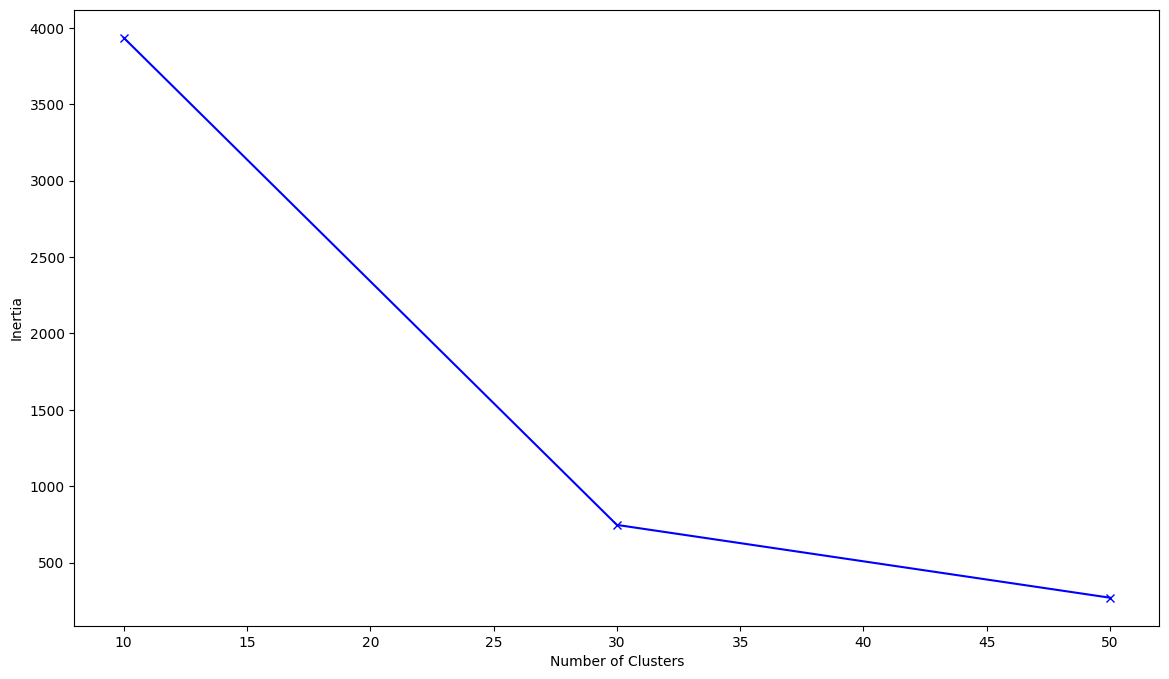

In [18]:
m2.plot_selection_metric()

In [19]:
narratives = m2.predict(postproc_roles, progress_bar = True)


Predicting entities for role: ARG0...
Matching known entities (with character matching)...


100%|█████████████████████████████████████████████████████████| 1877/1877 [00:00<00:00, 24336.79it/s]


Matching unknown entities (with clustering model)...
Computing phrase embeddings...


100%|███████████████████████████████████████████████████████████| 1795/1795 [00:13<00:00, 130.64it/s]


Dimension reduction of vectors (PCA)...
Dimension reduction of vectors (UMAP)...
Assignment to clusters...

Predicting entities for role: ARG1...
Matching known entities (with character matching)...


100%|█████████████████████████████████████████████████████████| 1948/1948 [00:00<00:00, 25210.91it/s]


Matching unknown entities (with clustering model)...
Computing phrase embeddings...


100%|███████████████████████████████████████████████████████████| 1873/1873 [00:14<00:00, 127.21it/s]


Dimension reduction of vectors (PCA)...
Dimension reduction of vectors (UMAP)...
Assignment to clusters...


In [20]:
from relatio.utils import prettify

pretty_narratives = []
for n in narratives: 
    pretty_narratives.append(prettify(n))

for i in range(10):           
    print(roles[i])
    print(postproc_roles[i])
    print(pretty_narratives[i])

{'ARG0': 'lui', 'B-V': 'favorisé', 'ARG1': 'la libération'}
{'ARG0': 'lui', 'B-V': 'favoriser', 'ARG1': 'le libération'}
vous favoriser le liberté
{'ARG0': 'La filière', 'B-V': 'fait', 'ARG1': 'partie'}
{'ARG0': 'le filière', 'B-V': 'faire', 'ARG1': 'partie'}
le nature faire le parole
{'ARG0': 'La filière', 'B-V': 'fait', 'ARG1': 'les bras'}
{'ARG0': 'le filière', 'B-V': 'faire', 'ARG1': 'le bras'}
le nature faire le main
{'ARG0': "J'", 'B-V': 'ferai', 'ARG1': 'un axe'}
{'B-V': 'ferai', 'ARG1': 'un axe'}
ferai an
{'ARG0': 'on', 'B-V': 'perd', 'ARG1': '100.000 emplois'}
{'ARG0': 'on', 'B-V': 'perd', 'ARG1': '100 000 emploi'}
on perd milliard
{'ARG0': 'qu’', 'B-V': 'relocalise', 'ARG1': 'la production'}
{'ARG0': 'qu', 'B-V': 'relocalise', 'ARG1': 'le production'}
on relocalise un association
{'ARG0': 'qu’', 'B-V': 'relocalise', 'ARG1': 'l’'}
{'ARG0': 'qu', 'B-V': 'relocalise'}
on relocalise
{'ARG0': 'on', 'B-V': 'relocalise', 'ARG1': 'la production'}
{'ARG0': 'on', 'B-V': 'relocalise', '

In [21]:
from relatio import build_graph, draw_graph

G = build_graph(
    narratives, 
    top_n = 100, 
    prune_network = True
)

draw_graph(
    G,
    notebook = True,
    show_buttons = False,
    width="1600px",
    height="1000px",
    output_filename = './output/network_of_narratives.html'
    )

./output/network_of_narratives.html
